<a href="https://colab.research.google.com/github/kuvaibhav/273P/blob/main/273P_TwitterSentimentDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/content/train.csv', sep=",", encoding='Latin-1')
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
#Clean the text

#Functions for cleaning the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
  text = re.sub(r'#', '', text) #remove hashtags
  text = re.sub(r'RT[\s]+', '', text) #remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyperlink

  return text

df['text'] = df['text'].apply(cleanTxt)

#Show the cleaned text
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
# Create a function to get subjectivity

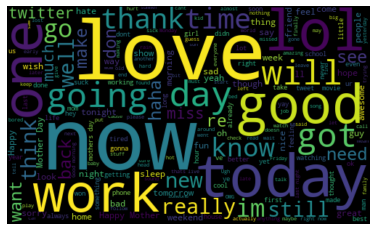

In [6]:
#Word Cloud Visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#Printing Positive Sentiments
j=1
for i in range(0, df['sentiment'].shape[0]):
  if(df['sentiment'][i] == 'positive'):
    print(str(j) + ')' + df['text'][i])
    print()
    j = j+1


Streaming output truncated to the last 5000 lines.
6083)Download movie  'Ben 10: Alien Force'  cool movie

6084) yeah I`ve been there, my son is two so we go to only the kid friendly places now;) congrats on the baby!

6085)Had a great talk with Tony this afternoon... we`re going to give it another go

6086)Happy Mother`s Day to all the moms! If you`re an awesome mom, you`ll help savechuck

6087)ooooh.... I have a headache.  Got to go to work now

6088) its fun though

6089)NOOOO!!!  'thehannabeth: i have a crush... ;)'

6090)Hi-5 to ALL my friends and ummm thanks for the follow and enjoy the ride IF I make too many trips (I will) for u and u gotta go i get it

6091)Happy Mothers Day Mum

6092)Woke up after about 6 hours of sleep. Feeling better now

6093) I`m back on Long Island today after spending the weekend in Manchester, VT. Hope you have a great week ahead.

6094)Engaged May 1st to the best guy  I could not be happier! I love you Jay!

6095) Hugs to you for not being able to sha

In [10]:
#Printing Negative Sentiments
j=1
for i in range(0, df['sentiment'].shape[0]):
  if(df['sentiment'][i] == 'negative'):
    print(str(j) + ')' + df['text'][i])
    print()
    j = j+1

Streaming output truncated to the last 5000 lines.
5282) But I can still putt 30 yards longer than you can hit your driver

5283)hanging out with Rex, missing Alabama and my No Textna already...

5284)michael scofiled Noooooo !!  I hate the writer, director n production

5285)Marley crying for more ball throwing....keeps eying me through the door

5286)Is sooooo tired... wants to crawl back into bed

5287) yeah, that was my point >.< please dont make me feel worse than i do

5288)_Fear_Me samee.. it sucks..

5289)Watching maxium 100. Why can`t I look beautiful like those girls.

5290)CRYING CUZ PEOPLE WONT FOLLOW ME!!!!!!!

5291)man.. it`s starting to rain real hard..

5292)i just got my nails done n i already messed them up  Alejandra <3

5293): Yeah, I fell asleep  I`m sorry. No way in the world I was waking up @ 7am lol. I had to work @ 9am.

5294)Darn it, I`m craving wedding cake... a craving that`s very hard to satisfy with anything else!

5295) If I can run by then, I will join y

In [12]:
# Get % of positive tweets
positive_tweets = df[df.sentiment == 'positive']
positive_tweets = positive_tweets['text']
round((positive_tweets.shape[0]/df.shape[0]) * 100, 1)

31.2

In [13]:
# Get % of negative tweets
positive_tweets = df[df.sentiment == 'negative']
positive_tweets = positive_tweets['text']
round((positive_tweets.shape[0]/df.shape[0]) * 100, 1)

28.3

In [14]:
# Get % of neutral tweets
positive_tweets = df[df.sentiment == 'neutral']
positive_tweets = positive_tweets['text']
round((positive_tweets.shape[0]/df.shape[0]) * 100, 1)

40.5

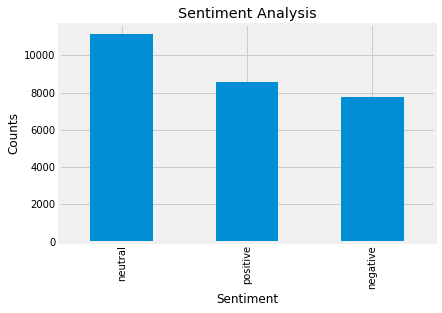

In [15]:
#Show the value counts
df['sentiment'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['sentiment'].value_counts().plot(kind='bar')
plt.show()

In [25]:
#Using polarity to understand the spread and degree of sentiments
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create a new column called polarity
df['polarity'] = df['text'].apply(getPolarity)
df

,textID,text,selected_text,sentiment,polarity,polarity_st
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0.000000,0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,-0.976562,-0.5
2,088c60f138,my boss is bullying me...,bullying me,negative,0.000000,0.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.000000,0.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.000000,0.0
...,...,...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0.000000,0.0
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0.184091,0.0
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0.366667,0.7
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0.300000,0.3


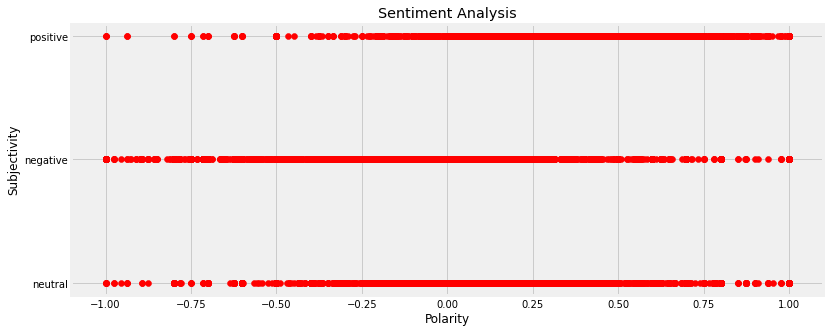

In [22]:
#Here we are considering the label as subjectivity. It has some error but it should
# be alright for high level analysis.
plt.figure(figsize=(12,5))
for i in range(0, 20000):
  plt.scatter(df['polarity'][i], df['sentiment'][i], color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
#Using polarity to understand the spread and degree of sentiments
def getSelectedTextPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create a new column called polarity
df['polarity_st'] = df['selected_text'].apply(getPolarity)
df

,textID,text,selected_text,sentiment,polarity,polarity_st
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0.000000,0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,-0.976562,-0.5
2,088c60f138,my boss is bullying me...,bullying me,negative,0.000000,0.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,0.000000,0.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0.000000,0.0
...,...,...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,0.000000,0.0
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,0.184091,0.0
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,0.366667,0.7
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0.300000,0.3


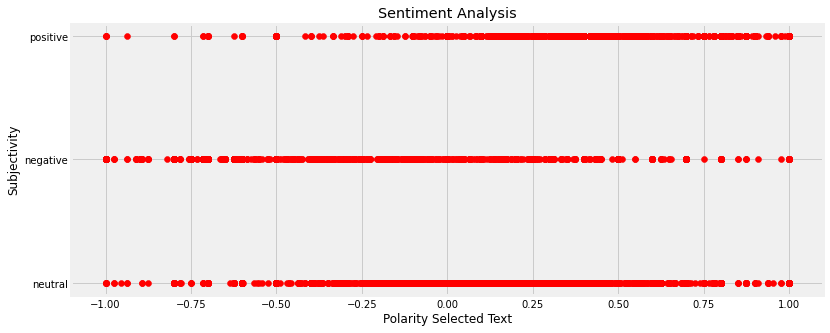

In [27]:
#Here we are considering the label as subjectivity. It has some error but it should
# be alright for high level analysis.
plt.figure(figsize=(12,5))
for i in range(0, 20000):
  plt.scatter(df['polarity_st'][i], df['sentiment'][i], color='red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity Selected Text')
plt.ylabel('Subjectivity')
plt.show()